# Setup

Utility section to read if you want to run this notebook.

The packages needed to run this notebook are listed in the requirements.txt file.

In a terminal, after having created a new envrionment, you can simply run:
```
pip install -r requirements.txt
```

For the notebook to work properly, you must place it in the same folder as the `model_torch.pth`, `utils.py`, `rossler_map.py` and `time_series.py` files.


# Packages Imports

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from rossler_map import RosslerMap
from time_series import DiscreteModel
from utils import Dynamics, Statistics, compute_traj, plot3D_traj

# Load models

Load trained model

In [2]:
checkpoint_path = Path("trained_model_correct.ckpt")

trained_model = DiscreteModel.load_from_checkpoint(checkpoint_path=checkpoint_path)

trained_model.normalize = False
# trained_model.eval()

Load ground thruth model

In [3]:
rossler_map_true = RosslerMap(delta_t=trained_model.hparams.delta_t)

# Set hyperparameters for trajectories

In [4]:
TRAJECTORY_DUR = 1000
nb_steps = int(TRAJECTORY_DUR // trained_model.hparams.delta_t)

save_dir_path = checkpoint_path.parent

## Compute trajectories

In [5]:
init_pos = [-5.75, -1.6, 0.02]  # Training init position

traj_pred, traj_true, time_list = compute_traj(trained_model, rossler_map_true, init_pos, nb_steps)
np.save(os.path.join(save_dir_path, "traj_pred_train.npy"), traj_pred)
np.save(os.path.join(save_dir_path, "traj_true_train.npy"), traj_true)
np.save(os.path.join(save_dir_path, "time_list_train.npy"), time_list)

  7%|▋         | 69557/999998 [00:16<03:43, 4169.84it/s]


KeyboardInterrupt: 

In [6]:
init_pos = [
    0.01,
    2.5,
    3.07,
]  # Init position different from the one used for training which was [-5.75, -1.6, 0.02]

traj_pred, traj_true, time_list = compute_traj(trained_model, rossler_map_true, init_pos, nb_steps)
np.save(os.path.join(save_dir_path, "traj_pred_test.npy"), traj_pred)
np.save(os.path.join(save_dir_path, "traj_true_test.npy"), traj_true)
np.save(os.path.join(save_dir_path, "time_list_test.npy"), time_list)

100%|██████████| 999998/999998 [04:36<00:00, 3610.50it/s]


# Compute metric on train data

## Load already computed trajectories

In [ ]:
traj_pred = np.load(os.path.join(save_dir_path, "traj_pred_train.npy"))
traj_true = np.load(os.path.join(save_dir_path, "traj_true_train.npy"))
time_list = np.load(os.path.join(save_dir_path, "time_list_train.npy"))

In [ ]:
len(traj_pred)

## Compute metrics

### Statistics

In [ ]:
stats = Statistics(wandb_logger=None, ts_n=100000)
stats.add_traj(traj_true=traj_true, traj_pred=traj_pred, time_list=time_list)
stats.plot_all()

### Dynamics

In [ ]:
# dym = Dynamics(
#     wandb_logger=None, true_model=rossler_map_true, trained_model=trained_model, max_it=nb_steps
# )
# dym.add_traj(traj_true=traj_true, traj_pred=traj_pred)
# dym.plot_all()

# Compute metric on test data

## Load already computed trajectories

In [7]:
traj_pred = np.load(os.path.join(save_dir_path, "traj_pred_test.npy"))
traj_true = np.load(os.path.join(save_dir_path, "traj_true_test.npy"))
time_list = np.load(os.path.join(save_dir_path, "time_list_test.npy"))

In [8]:
len(traj_pred)

999999

## Compute metrics

### Statistics

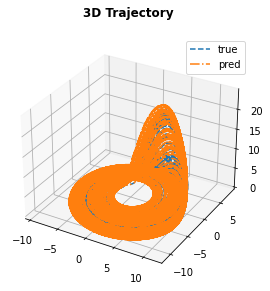

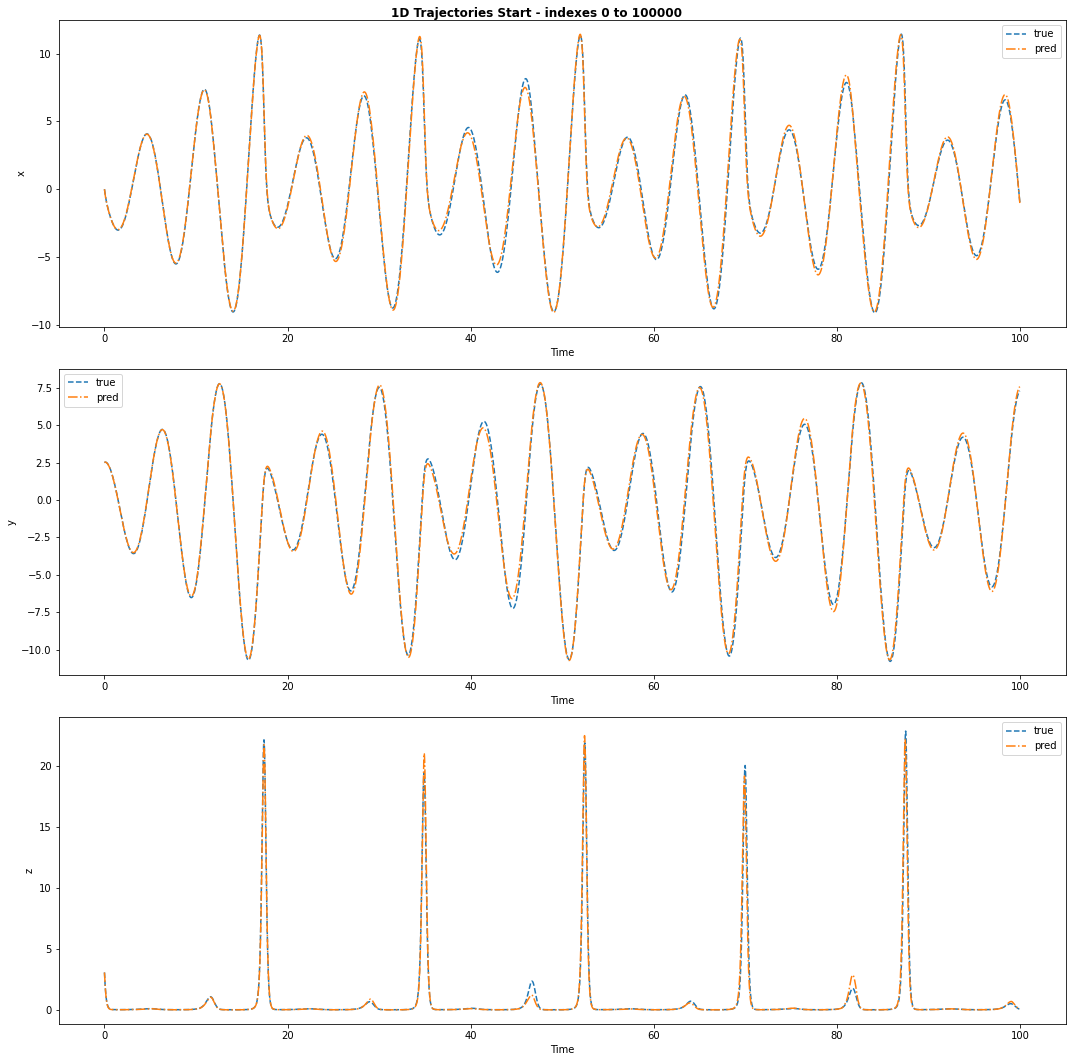

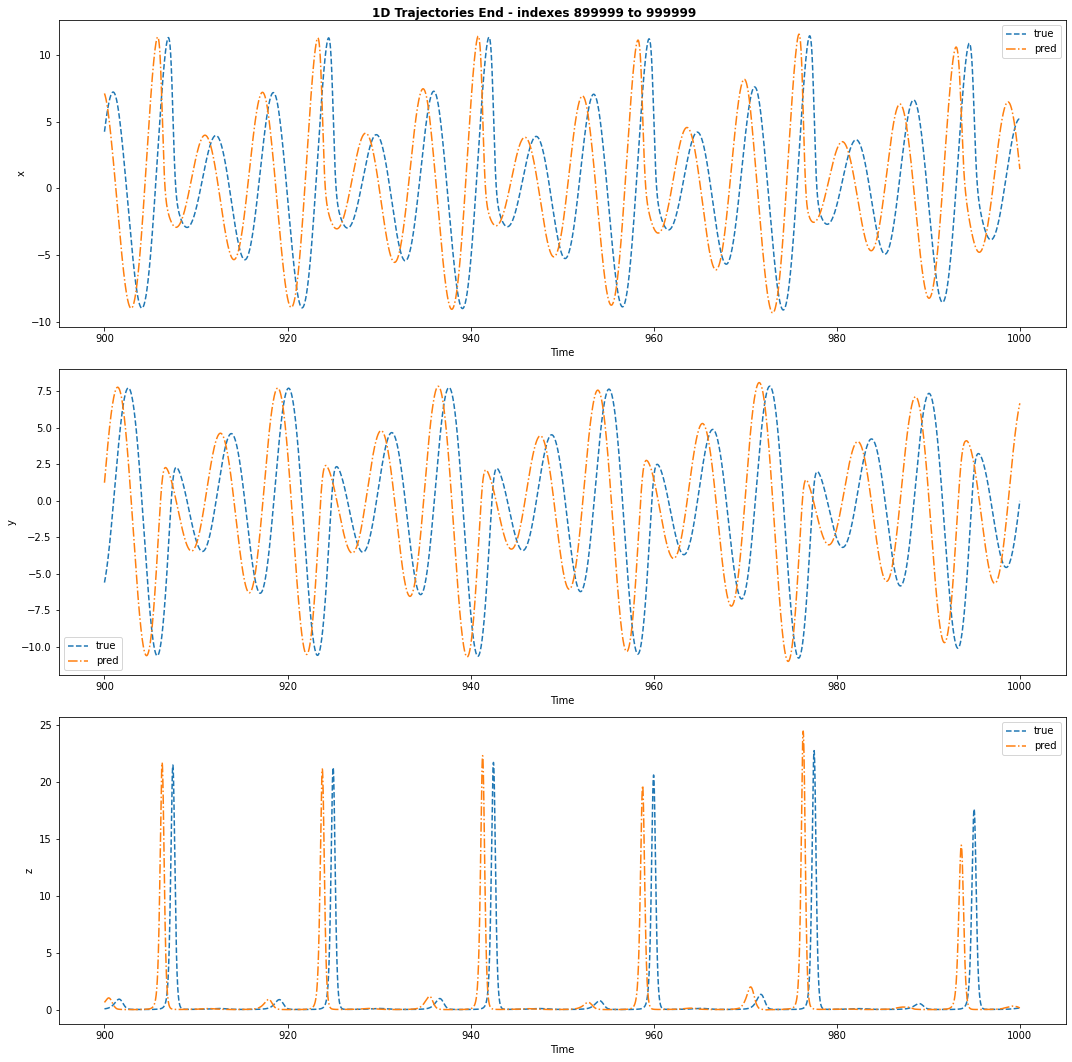

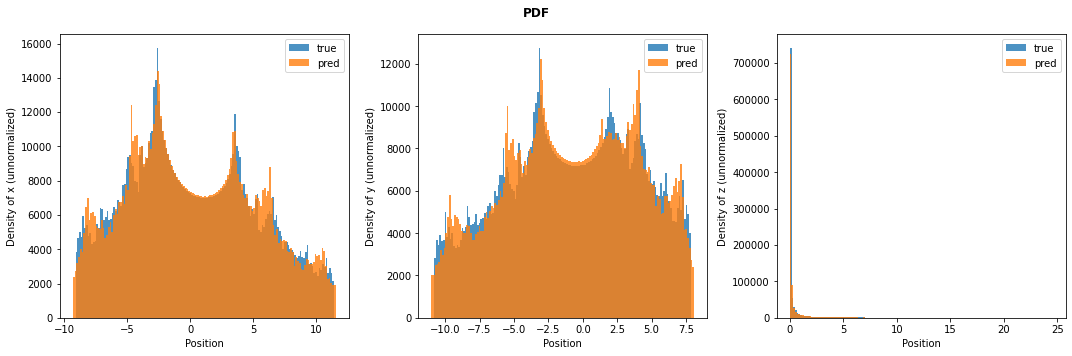

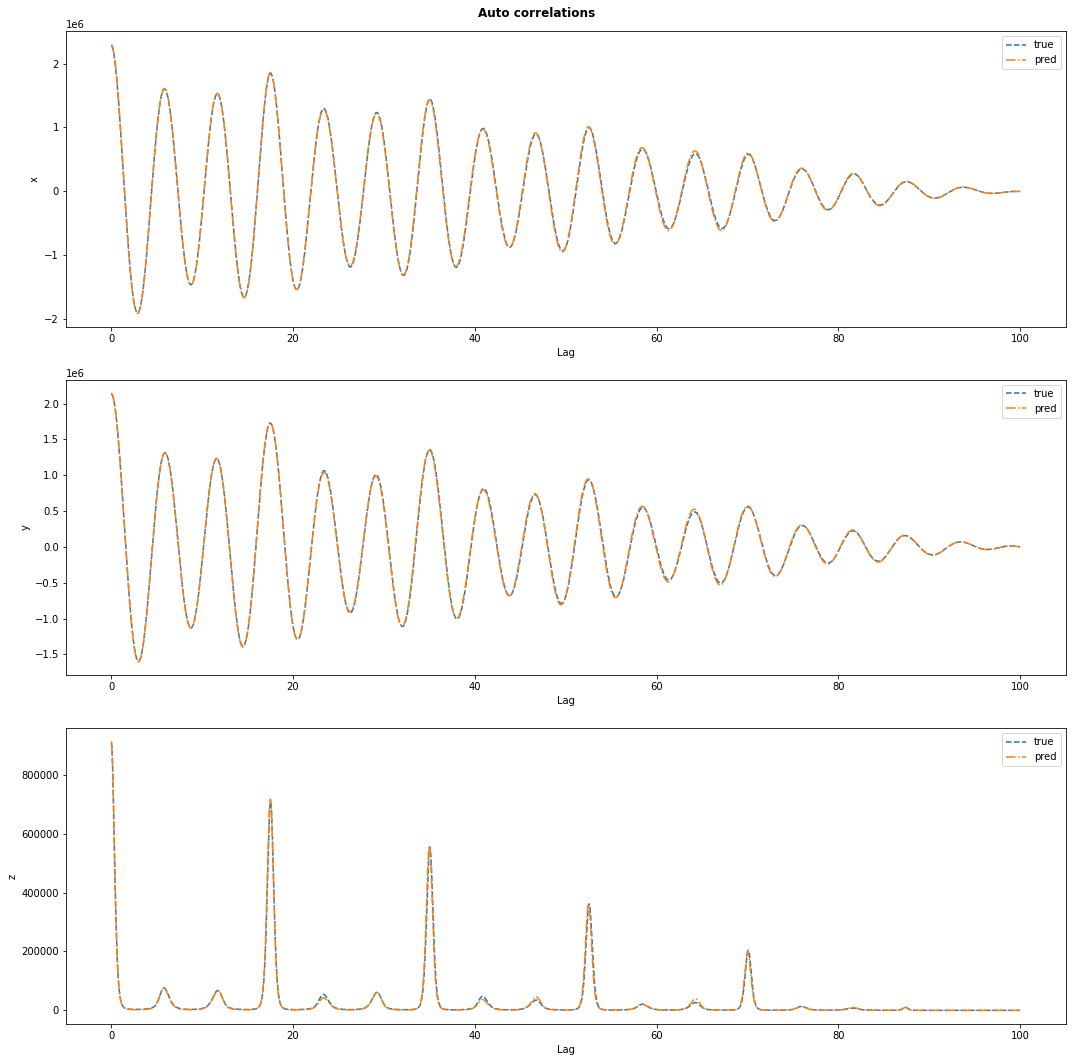

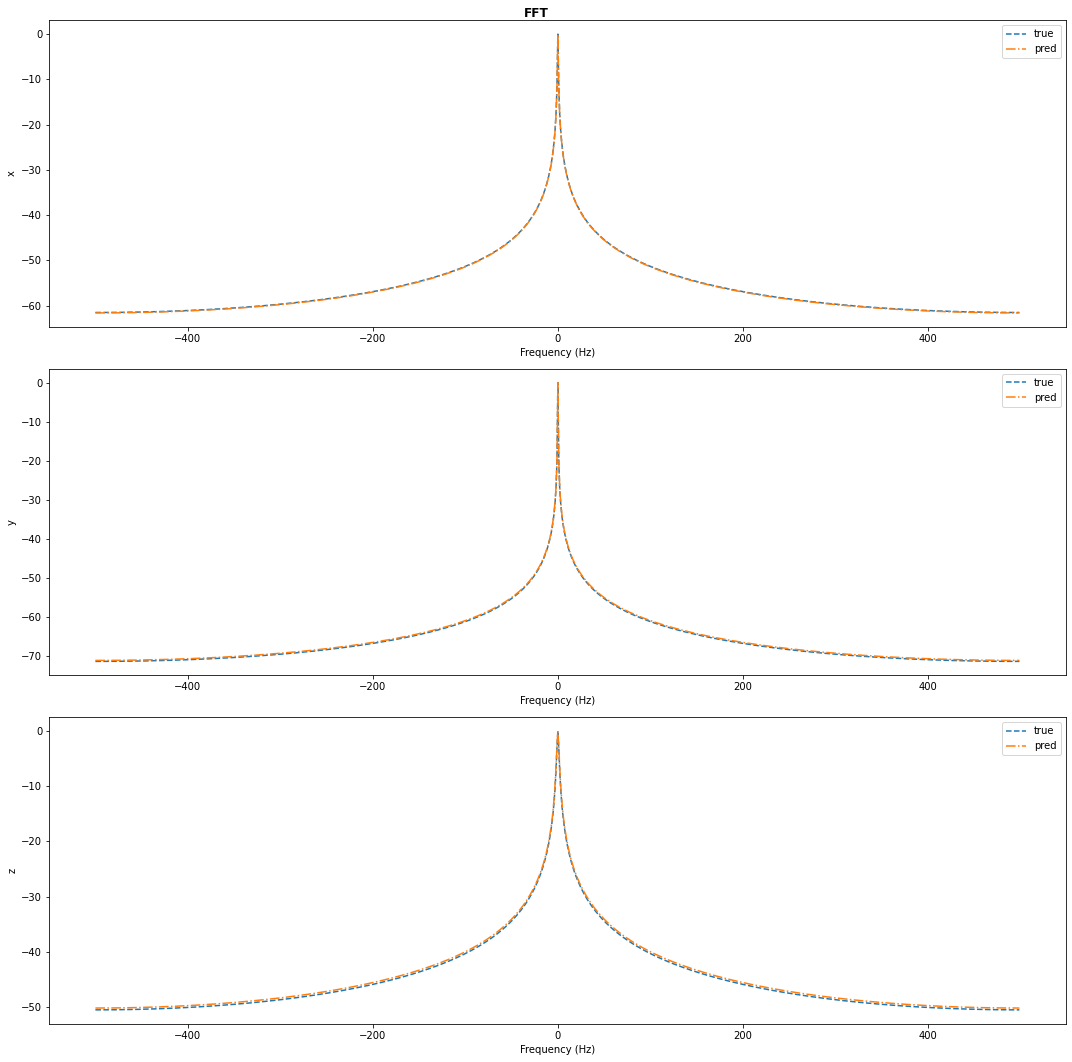

In [9]:
stats = Statistics(wandb_logger=None, ts_n=100000)
stats.add_traj(traj_true=traj_true, traj_pred=traj_pred, time_list=time_list)
stats.plot_all()

### Dynamics

In [ ]:
dym = Dynamics(
    wandb_logger=None, true_model=rossler_map_true, trained_model=trained_model, max_it=nb_steps
)
dym.add_traj(traj_true=traj_true, traj_pred=traj_pred)
dym.plot_all()

In [ ]:
trained_model.hparams.hidden_size